### Week 3 - Graph Visualization

First import necessary packages for plotting graphs using NetworkX and Matplotlib and set up graph size parameters...

In [221]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,12)

In [222]:
# Function copied from https://thispointer.com/python-how-to-sort-a-dictionary-by-key-or-value/.  
# Will be needed later on...
def sorted_dict(d):
    ms = sorted(d.items() , reverse=True, key=lambda x: x[1])
    return ms

Two .edges files were downloaded from *The Network Data Repository with Interactive Graph Analytics and Visualization* at [http://networkrepository.com](http://networkrepository.com).
      
Both are for mammal social networks.  The dolphins file is for a "social" network and the one for macaque monkeys is a "dominance" network.  

## Dolphins

<img src="images/dolphins.jpg" alt="Dolphins" width="900"/>

The following code reads in "mammalia-dolphin-florida-social.edges" data...

In [223]:
dolphins = nx.read_edgelist('mammalia-dolphin-florida-social/mammalia-dolphin-florida-social.edges', nodetype=int, 
                                     data=(('weight',int),))

The following code draws the network using NetworkX...

Note that one line containing "37 85 1" was removed from the edges file beccause there were no edges between those two dolphins (numbers 37 and 85) and the rest of the graph.  They were far off on the side and it made the rest of the graph hard to visualize.

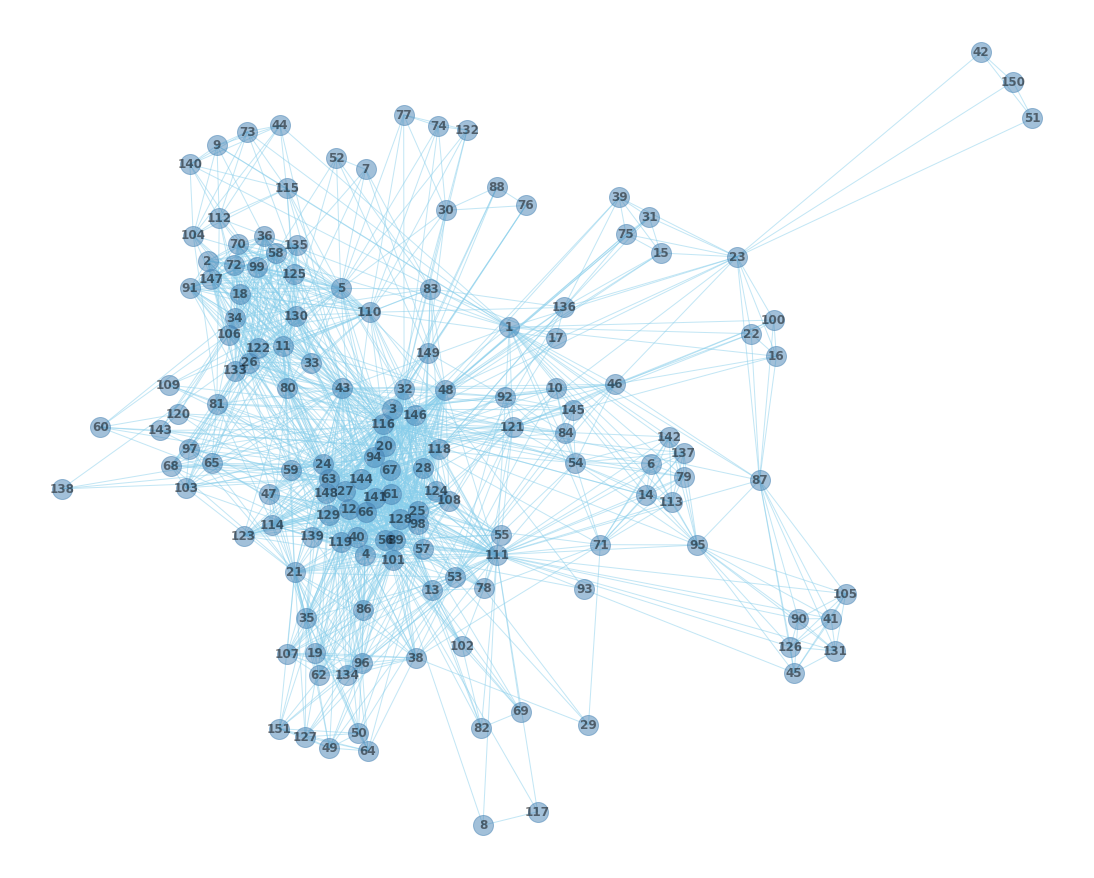

In [276]:
nx.draw(dolphins, with_labels=True, node_color="steelblue", node_size=400, font_weight='bold', 
        edge_color="skyblue", alpha=0.5)

The most interesting insight that immediately pops out from the graph is that there are 3 dolphins numbers 42, 51 and 150, that are only connected to the rest of the pod through one single other dolphin, number 23.  All 3 are connected to each other and to 23 but not to any other dolphin in the pod.  

Only one other dolphin seems to be even more isolated with less connections than 42, 51 and 150 who have 3 connections each.  Number 93 only has connections with 2 other dolphins in the pod total, numbers 57 and 110.  But those two are well connected to the rest of the pod.  

Two more dolphins, numbers 8 and 117 also have only 3 connections each, but unlike 42, 51 and 150 they each have connections to 2 other well-connected dolphins and each other.  

Remember there were also two dolphins, 37 and 85, who were deleted from the file because they had no connections to the rest of the pod at all.  Their only edge was one that connected the two of them to each other.  So those 2 are in fact the most isolated of the group.

All other dolphins in the pod have at least 4 connections but most have many more than that.  

This structure looks a lot like I would guess some human networks might look.  There are some outlier "loner" or "outcast" dolphins who have limited social connections compared to the majorty of their peers.  

### Metrics

#### Nodes Edges and Degree

In [280]:
print(nx.info(dolphins))

Name: 
Type: Graph
Number of nodes: 149
Number of edges: 1553
Average degree:  20.8456


In [227]:
d = nx.degree(dolphins)

In [228]:
min(dict(d).values())

2

In [229]:
max(dict(d).values())

69

Text(0.5, 1.0, 'Distribution of Degrees in Dolphin Network')

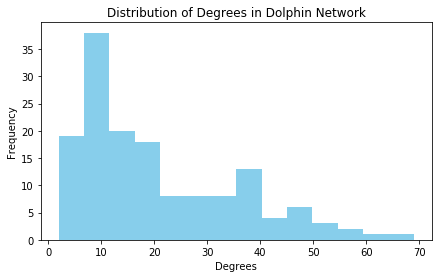

In [291]:
plt.figure(figsize=(7,4))
plt.hist(dict(d).values(), 14, color = "skyblue")
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.title('Distribution of Degrees in Dolphin Network')

In [231]:
ds = sorted_dict(dict(d))
ds[0:10]

[(116, 69),
 (111, 62),
 (24, 59),
 (119, 59),
 (3, 54),
 (63, 54),
 (101, 50),
 (129, 49),
 (146, 48),
 (61, 48)]

In [232]:
ds[-1]

(93, 2)

#### Closeness Centrality

In [233]:
d_cc = nx.closeness_centrality(dolphins)

In [234]:
d_cc_s = sorted_dict(d_cc)
d_cc_s[1:10]

[(111, 0.6244725738396625),
 (24, 0.6090534979423868),
 (119, 0.6090534979423868),
 (3, 0.6040816326530613),
 (63, 0.6040816326530613),
 (146, 0.5967741935483871),
 (61, 0.5896414342629482),
 (101, 0.5873015873015873),
 (129, 0.5849802371541502)]

In [235]:
d_cc_s[-1]

(51, 0.31223628691983124)

#### Betweenness Centrality

In [236]:
d_bc = nx.betweenness_centrality(dolphins)

In [237]:
d_bc_s = sorted_dict(d_bc)
d_bc_s[1:10]

[(116, 0.10660585436405577),
 (3, 0.060692540414938344),
 (43, 0.058793411707507494),
 (119, 0.05645899125681446),
 (23, 0.050878493844890536),
 (146, 0.04972310488868277),
 (48, 0.04710882989398321),
 (32, 0.03789480604036151),
 (24, 0.03705698783345232)]

In [238]:
d_bc_s[-1]

(93, 0.0)

#### Eigenvector Centrality

In [239]:
d_ec = nx.eigenvector_centrality(dolphins)

In [240]:
d_ec_s = sorted_dict(d_ec)
d_ec_s[1:10]

[(24, 0.18686265791454115),
 (63, 0.18329374100634405),
 (119, 0.18150292300896842),
 (129, 0.1739888773410532),
 (101, 0.17203582804671796),
 (61, 0.17105178546891275),
 (56, 0.16895451104022574),
 (40, 0.1673073937313991),
 (111, 0.16710196658913679)]

In [241]:
d_ec_s[-1]

(51, 0.00043286176783971015)

#### 'Elite' Group

In [242]:
# Code adapted from Social Network Analysis for Startups chapter 3 page 54

## make a list of the elite group by merging top ten groups for 3 centrality metrics 
names1 = [x[0] for x in ds[:10]]
names2 = [x[0] for x in d_cc_s[:10]]
names3 = [x[0] for x in d_bc_s[:10]]

## use Python sets to compute a union of the sets 
names = list(set(names1) | set(names2) | set(names3))

## build a table with centralities 
data = [[name,d[name],d_cc[name],d_bc[name]] for name in names]
pd.DataFrame.from_records(data, columns=['Dolphin', 'Degree', 'Closeness', 'Betweenness'])

,Dolphin,Degree,Closeness,Betweenness
0,32,43,0.562738,0.037895
1,129,49,0.584980,0.020889
2,3,54,0.604082,0.060693
3,101,50,0.587302,0.030207
4,43,47,0.564885,0.058793
5,111,62,0.624473,0.125630
6,48,42,0.573643,0.047109
7,146,48,0.596774,0.049723
8,116,69,0.643478,0.106606
9,23,17,0.449848,0.050878


In [283]:
# Code adapted from Social Network Analysis for Startups chapter 3 page 54

## make a list of the elite group by merging top ten groups for 3 centrality metrics 
names1 = [x[0] for x in ds[:10]]
names2 = [x[0] for x in d_cc_s[:10]]
names3 = [x[0] for x in d_bc_s[:10]]
names4 = [x[0] for x in d_ec_s[:10]]

## use Python sets to compute a union of the sets 
names = list(set(names4) - (set(names1) | set(names2) | set(names3)))

## build a table with centralities 
data = [[name,d[name],d_cc[name],d_bc[name],d_ec[name]] for name in names]
pd.DataFrame.from_records(data, columns=['Dolphin', 'Degree', 'Closeness', 'Betweenness', 'Eigenvector'])

,Dolphin,Degree,Closeness,Betweenness,Eigenvector
0,40,44,0.564885,0.007760,0.167307
1,56,47,0.578125,0.012737,0.168955


There are two dolphins (numbers 40 and 56) in the top 10 eigenvector centrality list that are not in the combined top ten lists for the other 3 centrality measures.  These are the so called "Gray Cardinals" who while not so well-connected themselves are connected to others who are well-connected.  

#### Radius and Diameter

In [244]:
nx.radius(dolphins)

2

In [245]:
nx.diameter(dolphins)

4

#### Eccentricity

In [246]:
min(nx.eccentricity(dolphins))

1

In [247]:
max(nx.eccentricity(dolphins))

151

In [248]:
dolphin_ecc = pd.DataFrame((nx.eccentricity(dolphins).values()))[0].value_counts().sort_index()
dolphin_ecc

2     1
3    87
4    61
Name: 0, dtype: int64

Text(0, 0.5, 'Frequency')

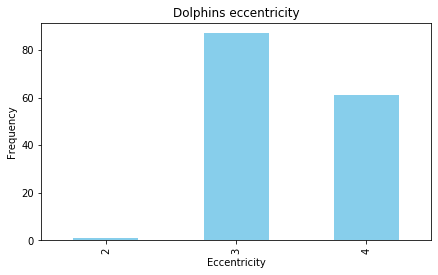

In [290]:
plot = dolphin_ecc.plot(kind='bar',
                        color = "skyblue",
                        figsize=(7,4),
                        title="Dolphins eccentricity")
plot.set_xlabel("Eccentricity")
plot.set_ylabel("Frequency")

## Macaques

![Macaques](images/macaques.jpg)

The following code reads in the "mammalia-macaque-dominance.edges" data file...

In [250]:
macaques = nx.read_edgelist('mammalia-macaque-dominance/mammalia-macaque-dominance.edges', nodetype=int, 
                                     data=(('weight',int),))

The following code draws the network using NetworkX...

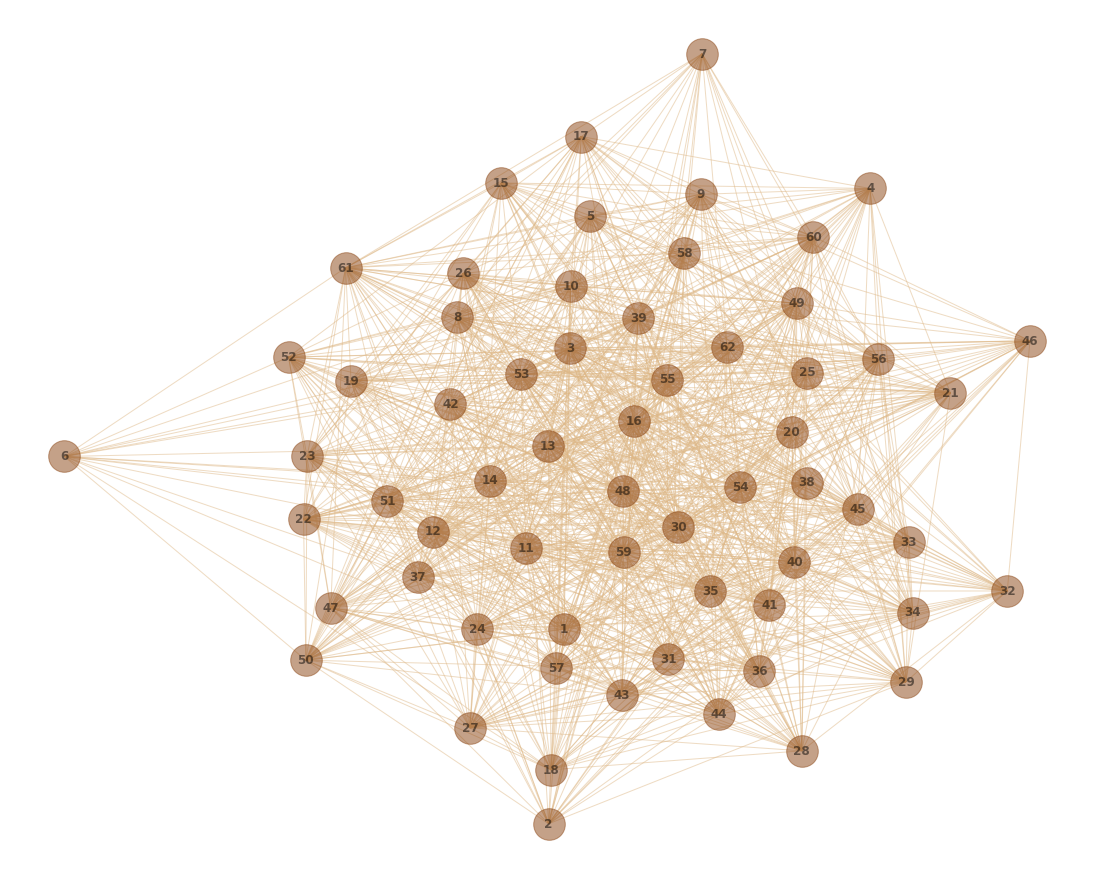

In [251]:
nx.draw(macaques, with_labels=True, node_color="saddlebrown", node_size=1000, font_weight='bold', 
        edge_color="burlywood", alpha=0.5)

Just on visual inspection alone, we can see that the macaque dominance network is strikingly different from the dolphin network visualized above.  All members of the group are well connected with at least a dozen edges connecting them to the rest of the group.  There seems to be much less variance in the number of connections each individual has in this network vs. a very wide variance in the dolphin network.  

### Metrics

#### Nodes Edges and Degree

In [281]:
print(nx.info(macaques))

Name: 
Type: Graph
Number of nodes: 62
Number of edges: 1167
Average degree:  37.6452


In [253]:
m = nx.degree(macaques)

In [254]:
min(dict(m).values())

17

In [255]:
max(dict(m).values())

55

Text(0.5, 1.0, 'Distribution of Degrees in Macaque Network')

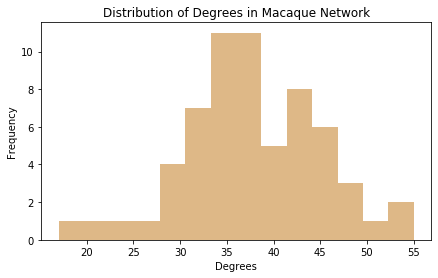

In [287]:
plt.figure(figsize=(7,4))
plt.hist(dict(m).values(), 14, color = "burlywood")
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.title('Distribution of Degrees in Macaque Network')

In [257]:
ms = sorted_dict(dict(m))
ms[0:10]

[(48, 55),
 (30, 53),
 (59, 51),
 (12, 49),
 (16, 47),
 (40, 47),
 (13, 46),
 (14, 46),
 (41, 46),
 (35, 45)]

In [258]:
ms[-1]

(6, 17)

#### Closeness Centrality

In [259]:
m_cc = nx.closeness_centrality(macaques)

In [260]:
m_cc_s = sorted_dict(m_cc)
m_cc_s[1:10]

[(30, 0.8840579710144928),
 (59, 0.8591549295774648),
 (12, 0.8356164383561644),
 (16, 0.8133333333333334),
 (40, 0.8133333333333334),
 (13, 0.8026315789473685),
 (14, 0.8026315789473685),
 (41, 0.8026315789473685),
 (35, 0.7922077922077922)]

In [261]:
m_cc_s[-1]

(6, 0.580952380952381)

#### Closeness Centrality

In [262]:
m_bc = nx.betweenness_centrality(macaques)

In [263]:
m_bc_s = sorted_dict(m_bc)
m_bc_s[1:10]

[(30, 0.013915476508492107),
 (59, 0.012580824960580403),
 (12, 0.011912288814093008),
 (55, 0.0112336308200591),
 (13, 0.010682548449676756),
 (40, 0.010509721793316322),
 (14, 0.010394299661348525),
 (62, 0.009869243029725503),
 (16, 0.009360671601008634)]

In [264]:
m_bc_s[-1]

(6, 0.0009558694271049144)

#### Eigenvector Centrality

In [265]:
m_ec = nx.eigenvector_centrality(macaques)

In [266]:
m_ec_s = sorted_dict(m_ec)
m_ec_s[1:10]

[(30, 0.1723499397325954),
 (59, 0.16590423942672292),
 (12, 0.15883070770487354),
 (16, 0.1552777653254267),
 (41, 0.15457065874528633),
 (40, 0.15327774230232388),
 (35, 0.1519355480936074),
 (13, 0.149788559723127),
 (14, 0.14952984880127926)]

In [267]:
m_ec_s[-1]

(6, 0.059040672085233906)

#### 'Elite' Group

In [268]:
# Code adapted from Social Network Analysis for Startups chapter 3 page 54

## make a list of the elite group by merging top ten groups for 3 centrality metrics 
names1 = [x[0] for x in ms[:10]]
names2 = [x[0] for x in m_cc_s[:10]]
names3 = [x[0] for x in m_bc_s[:10]]

## use Python sets to compute a union of the sets 
names = list(set(names1) | set(names2) | set(names3))

## build a table with centralities 
data = [[name,m[name],m_cc[name],m_bc[name]] for name in names]
pd.DataFrame.from_records(data, columns=['Macaque Monkey', 'Degree', 'Closeness', 'Betweenness'])

,Macaque Monkey,Degree,Closeness,Betweenness
0,35,45,0.792208,0.007414
1,40,47,0.813333,0.010510
2,41,46,0.802632,0.008016
3,12,49,0.835616,0.011912
4,13,46,0.802632,0.010683
5,14,46,0.802632,0.010394
6,48,55,0.910448,0.016568
7,16,47,0.813333,0.009361
8,55,45,0.792208,0.011234
9,62,44,0.782051,0.009869


In [284]:
# Code adapted from Social Network Analysis for Startups chapter 3 page 54

## make a list of the elite group by merging top ten groups for 3 centrality metrics 
names1 = [x[0] for x in ms[:10]]
names2 = [x[0] for x in m_cc_s[:10]]
names3 = [x[0] for x in m_bc_s[:10]]
names4 = [x[0] for x in m_ec_s[:10]]

## use Python sets to compute a union of the sets 
names = list(set(names4) - (set(names1) | set(names2) | set(names3)))

## build a table with centralities 
data = [[name,m[name],m_cc[name],m_bc[name],m_ec[name]] for name in names]
pd.DataFrame.from_records(data, columns=['Macaque Monkey', 'Degree', 'Closeness', 'Betweenness', 'Eigenvector'])

,Macaque Monkey,Degree,Closeness,Betweenness,Eigenvector


There are no macaque monkeys in the top 10 eigenvector centrality list that are not in the combined top ten lists for the other 3 centrality measures. 

#### Radius and Diameter

In [270]:
nx.radius(macaques)

2

In [271]:
nx.diameter(macaques)

2

#### Eccentricity

In [272]:
min(nx.eccentricity(macaques))

1

In [273]:
max(nx.eccentricity(macaques))

62

In [274]:
macaque_counts = pd.DataFrame((nx.eccentricity(macaques).values()))[0].value_counts().sort_index()
macaque_counts

2    62
Name: 0, dtype: int64

Text(0, 0.5, 'Frequency')

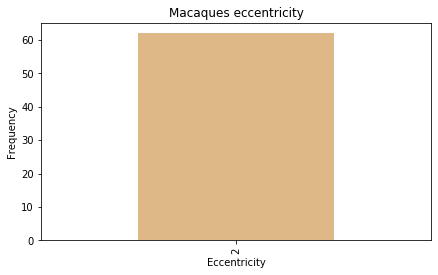

In [288]:
plot = macaque_counts.plot(kind='bar', 
                           color = "burlywood",
                           figsize=(7,4),
                           title="Macaques eccentricity")
plot.set_xlabel("Eccentricity")
plot.set_ylabel("Frequency")

### References

Ryan A. Rossi, Nesreen K. Ahmed, and others. (2015). The Network Data Repository with Interactive Graph Analytics and Visualization. Retrieved from http://networkrepository.com